<a href="https://colab.research.google.com/github/Vyoma-garg/Deep_Learning/blob/main/10_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import PIL

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, cache_dir = '.', untar = True)

228827136/228813984 [==============================] - 2s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir= pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
image_count= len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses= list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/14145188939_b4de638bd3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/19271410704_932d1f2c97_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3074406590_91c697c805_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15277801151_5ed88f40f0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14414117598_cf70df30de.jpg')]

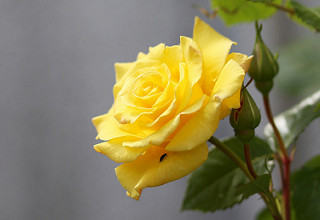

In [8]:
PIL.Image.open(str(roses[0]))

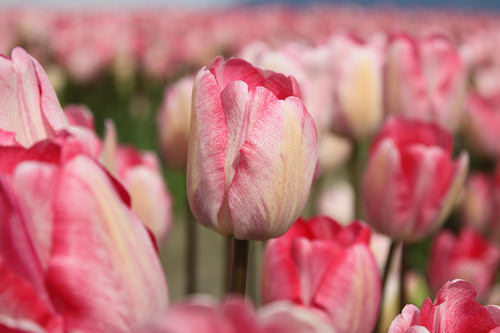

In [9]:
tulips= list(data_dir.glob('tulips/*.jpg'))
PIL.Image.open(str(tulips[0]))

In [10]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [11]:
flowers_images_dict['roses'][0]

PosixPath('datasets/flower_photos/roses/14145188939_b4de638bd3_n.jpg')

In [12]:
flowers_labels_dict = {   #assigning class numbers randomly
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

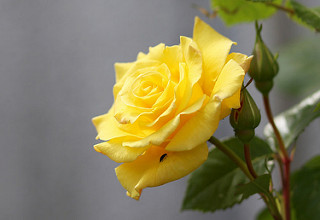

In [13]:
img= cv2.imread(str(flowers_images_dict['roses'][0]))
img


from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [14]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [15]:
x,y=[],[]

for flower_name, images in flowers_images_dict.items():
  print(flower_name)
  print(len(images))

  for img in images:
    img= cv2.imread(str(img))
    resized_img= cv2.resize(img, (180,180))
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name])


roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


[0, 0, 0, 0, 0]


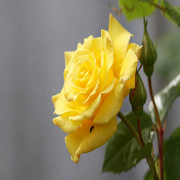

In [16]:
print(y[:5])
cv2_imshow(x[0])

In [17]:
x=np.array(x)
y=np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [19]:
len(x_train)

2752

In [20]:
x_train= x_train/255
x_test= x_test/255

In [23]:
model= keras.Sequential([
              #cnn
              keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
              keras.layers.MaxPooling2D(),
              
              keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
              keras.layers.MaxPooling2D(),

              #dense
              keras.layers.Flatten(),
              keras.layers.Dense(128, activation='relu'),
              keras.layers.Dense(5, activation='softmax')
])


model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.fit(x_train,y_train,epochs=30)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


86/86 [==============================] - 15s 61ms/step - loss: 1.5087 - accuracy: 0.4495
Epoch 2/30
86/86 [==============================] - 5s 61ms/step - loss: 0.8934 - accuracy: 0.6642
Epoch 3/30
86/86 [==============================] - 5s 61ms/step - loss: 0.5684 - accuracy: 0.7972
Epoch 4/30
86/86 [==============================] - 5s 62ms/step - loss: 0.2563 - accuracy: 0.9153
Epoch 5/30
86/86 [==============================] - 5s 61ms/step - loss: 0.0947 - accuracy: 0.9731
Epoch 6/30
86/86 [==============================] - 5s 61ms/step - loss: 0.0505 - accuracy: 0.9898
Epoch 7/30
86/86 [==============================] - 5s 62ms/step - loss: 0.0282 - accuracy: 0.9949
Epoch 8/30
86/86 [==============================] - 5s 62ms/step - loss: 0.0143 - accuracy: 0.9967
Epoch 9/30
86/86 [==============================] - 5s 62ms/step - loss: 0.0048 - accuracy: 0.9993
Epoch 10/30
86/86 [==============================] - 5s 62ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 11/30
86/86 [

In [24]:
model.evaluate(x_test, y_test)

 3/29 [==>...........................] - ETA: 0s - loss: 3.3678 - accuracy: 0.5833

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


29/29 [==============================] - 1s 32ms/step - loss: 3.0047 - accuracy: 0.6078


[3.004671335220337, 0.6078431606292725]

In [25]:
y_pred= model.predict(x_test)

y_pred_classes= [np.argmax(elemnt) for elemnt in y_pred]

In [29]:
y_pred_classes[1]

2

In [30]:
y_test[1]

0

In [32]:
np.argmax(y_pred[1])

2

In [35]:
for i in range(len(y_test)):
  if y_pred_classes[i] == y_test[i]:

   print(y_test[i])
   break

2


## DATA AUGMENTATION TO REDUCE OVERFITTING

In [41]:
data_aug= keras.Sequential([
                            layers.experimental.preprocessing.RandomZoom(0.7)
])

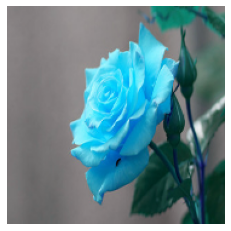

In [39]:
plt.axis('off')
plt.imshow(x[0])

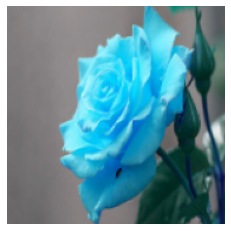

In [42]:
plt.axis('off')
plt.imshow(data_aug(x)[0].numpy().astype('uint8'))

In [43]:
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip('horizontal', input_shape = (180, 180, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.3),
                                      

])

In [45]:
model = Sequential([
                    data_augmentation, 
                    layers.Conv2D(16 , 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32 , 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64 , 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.2),

                    # Dense
                    layers.Flatten(), #flatten before passing into dense network
                    layers.Dense(128, activation = 'relu'),
                    layers.Dense(5, activation = 'softmax'),
                    
])


model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 30)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


86/86 [==============================] - 6s 49ms/step - loss: 1.3998 - accuracy: 0.4081
Epoch 2/30
86/86 [==============================] - 4s 49ms/step - loss: 1.1073 - accuracy: 0.5614
Epoch 3/30
86/86 [==============================] - 4s 48ms/step - loss: 1.0334 - accuracy: 0.6032
Epoch 4/30
86/86 [==============================] - 4s 49ms/step - loss: 0.9372 - accuracy: 0.6355
Epoch 5/30
86/86 [==============================] - 4s 48ms/step - loss: 0.8457 - accuracy: 0.6748
Epoch 6/30
86/86 [==============================] - 4s 49ms/step - loss: 0.7998 - accuracy: 0.6948
Epoch 7/30
86/86 [==============================] - 4s 48ms/step - loss: 0.7769 - accuracy: 0.7078
Epoch 8/30
86/86 [==============================] - 4s 48ms/step - loss: 0.7511 - accuracy: 0.7115
Epoch 9/30
86/86 [==============================] - 4s 48ms/step - loss: 0.7108 - accuracy: 0.7206
Epoch 10/30
86/86 [==============================] - 4s 49ms/step - loss: 0.7033 - accuracy: 0.7304
Epoch 11/30
86/86 [=

In [46]:
model.evaluate(x_test, y_test)

 4/29 [===>..........................] - ETA: 0s - loss: 0.8819 - accuracy: 0.7344

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


29/29 [==============================] - 1s 22ms/step - loss: 0.8280 - accuracy: 0.7331


[0.8279843926429749, 0.7331154942512512]